In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [100]:
FI_matrix = pd.read_csv('FI_across_iterations.csv', index_col=0, delimiter=';')
FI_matrix = FI_matrix.T
FI_matrix

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
Unnamed: 1,g_Peptoniphilus,g_Serratia,g_Cloacibacillus,g_Cloacibacillus,g_Turicimonas,g_Aurantimicrobium,g_Dorea,g_Kangiella,g_Atopobium,g_Spirochaeta,g_Parvimonas,g_Psychroflexus,g_Cosenzaea,g_Cosenzaea
Unnamed: 2,g_Achromobacter,g_Caproiciproducens,g_Anaerotignum,g_Piscinibacter,g_Akkermansia,g_Petrimonas,g_Parabacteroides,g_Marinospirillum,g_Lactobacillus,g_Duganella,g_Peptostreptococcus,g_Gangjinia,g_Desulfoconvexum,g_Zooshikella
Unnamed: 3,g_Proteus,g_Kineothrix,g_Odoribacter,g_Taurinivorans,g_Butyrivibrio,g_Vibrio,g_Faecalibacterium,g_Parabacteroides,g_Peptostreptococcus,g_Soonwooa,g_Anaerofustis,g_Salinirepens,g_Orbus,g_Saccharibacillus
Unnamed: 4,g_Rhodoluna,g_Peptoniphilus,g_Chakrabartyella,g_Aeromonas,g_Selenomonas,g_Akkermansia,g_Solobacterium,g_Dorea,g_Zhizhongheella,g_Ottowia,g_Bifidobacterium,g_Tepidibacillus,g_Dolosicoccus,g_Yimella
Unnamed: 5,g_Salmonella,g_Ideonella,g_Aeromonas,g_Pusillibacter,g_Peptoniphilus,g_Segatella,g_Agrobacterium,g_Tepidiphilus,g_Mogibacterium,g_Catabacter,g_Phascolarctobacterium,g_Kiloniella,g_Dermatophilus,g_Luteococcus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 396,g_Butyricimonas,g_Roseateles,g_Faecalibaculum,g_Faecalibaculum,g_Ruthenibacterium,g_Taurinivorans,g_Lachnoclostridium,g_Pseudohaliea,g_Chelonobacter,g_Solobacterium,g_Dialister,g_Microbulbifer,g_Aeromonas,g_Wohlfahrtiimonas
Unnamed: 397,g_Ideonella,g_Lachnoanaerobaculum,g_Turicimonas,g_Vescimonas,g_Anaerocolumna,g_Mogibacterium,g_Intestinimonas,g_Alkanindiges,g_Fusobacterium,g_Thioalkalimicrobium,g_Lactovum,g_Yuhushiella,g_Paraprevotella,g_Mahella
Unnamed: 398,g_Clostridioides,g_Kineothrix,g_Porphyromonas,g_Oscillibacter,g_Blautia,g_Vogesella,g_Gallibacterium,g_Desulfovermiculus,g_Sporomusa,g_Atopobium,g_Geofilum,g_Parvimonas,g_Lautropia,g_Pelosinus
Unnamed: 399,g_Clostridium,g_Prevotella,g_Lachnospira,g_Subdoligranulum,g_Sutterella,g_Porphyromonas,g_Acidithiobacillus,g_Psychroserpens,g_Leeuwenhoekiella,g_Suttonella,g_Lachnoanaerobaculum,g_Brenneria,g_Holdemanella,g_Phocoenobacter


In [106]:
# Melt the DataFrame to have a single column of microbe names
melted_df = FI_matrix.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

# Filter out microbes that occur only once
filtered_microbe_counts = microbe_counts[microbe_counts > 19]

# Convert the filtered counts to a DataFrame for better readability
ranked_microbes = filtered_microbe_counts.reset_index()
ranked_microbes.columns = ['microbe', 'frequency']

# Sort the DataFrame by frequency in descending order
ranked_microbes = ranked_microbes.sort_values(by='frequency', ascending=False)

# Initialize a new DataFrame with microbe names as index and model names as columns
ranked_microbe_list = ranked_microbes['microbe']
result_df = pd.DataFrame(index=ranked_microbe_list, columns=FI_matrix.columns)

# Fill the DataFrame with frequencies
for model in FI_matrix.columns:
    model_microbes = FI_matrix[model]
    for rank, microbe in enumerate(model_microbes):
        if microbe in result_df.index:
            result_df.loc[microbe, model] = filtered_microbe_counts[microbe]

# Fill NaN values with None
result_df = result_df.where(pd.notnull(result_df), None)

# Print the resulting DataFrame
result_df

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
microbe,,,,,,,,,,,,,,
g_Cloacibacillus,None,None,94,94,94,94,None,None,None,None,94,None,94,94
g_Selenomonas,72,72,None,72,72,72,None,None,72,72,None,None,None,None
g_Faecalibacterium,None,69,None,69,None,69,69,69,69,None,None,None,69,None
g_Lachnospira,None,None,62,62,None,62,None,None,62,62,None,None,62,None
g_Peptostreptococcus,None,None,61,61,None,None,None,None,61,61,61,61,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_Actinomyces,None,None,None,None,None,None,None,None,20,None,20,None,None,None
g_Anaerocolumna,None,20,None,20,20,20,None,None,None,None,None,None,None,None
g_Tamlicoccus,None,None,None,None,None,None,None,None,None,None,None,None,20,20


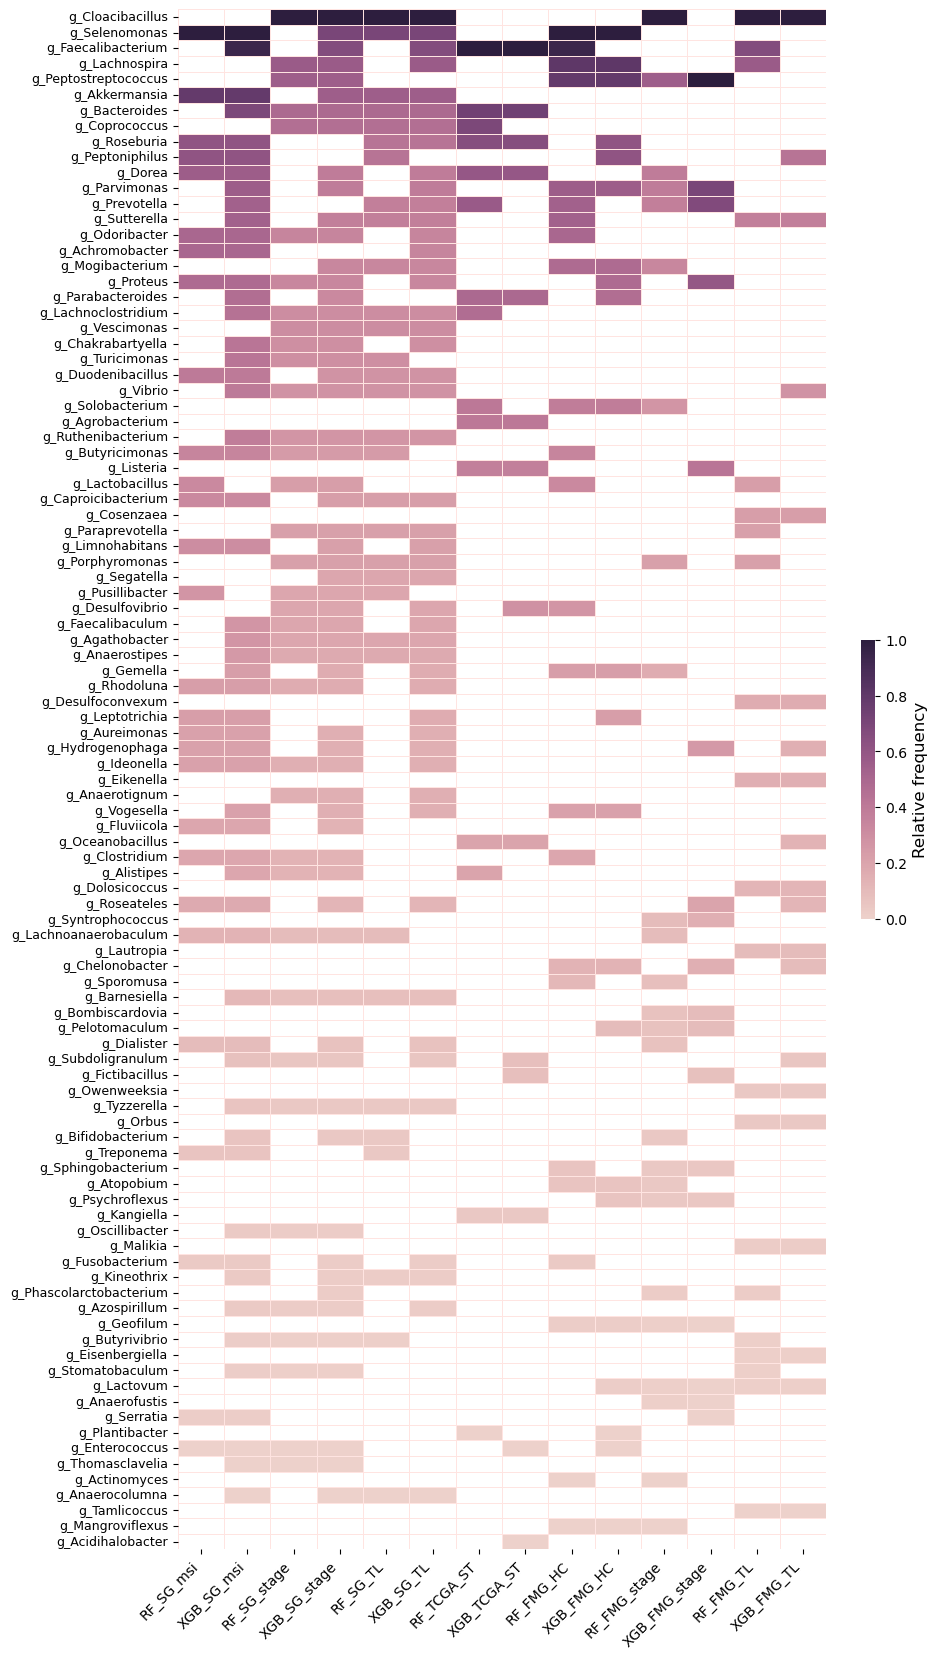

In [107]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')
#result_df.fillna(0, inplace=True)  # Replace NaN with 0 for scaling

# Apply Min-Max Scaling and invert the result
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(result_df)

# Convert to DataFrame
normalized_df = pd.DataFrame(scaled_df, index=result_df.index, columns=result_df.columns)


# Fill NaN values with 0 if necessary
#normalized_df = normalized_df.fillna(0)

# Create a heatmap with broader lines between cells
plt.figure(figsize=(9, 20))
cmap = sns.cubehelix_palette(as_cmap=True)
heatmap = sns.heatmap(normalized_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Relative frequency', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')
# Adjust the color bar label size
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Relative frequency', fontsize=12)  # Change 'fontsize' to your desired size

# Optionally adjust the tick label size if needed
colorbar.ax.tick_params(labelsize=10)

plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=9)

# Display the heatmap
plt.show()

In [108]:
# Melt the DataFrame to have a single column of microbe names
melted_df = FI_matrix.melt(value_name='microbe', var_name='model')

# Count occurrences of each microbe
microbe_counts = melted_df['microbe'].value_counts()

# Filter out microbes that occur only once
filtered_microbe_counts = microbe_counts[microbe_counts > 19*2]

# Convert the filtered counts to a DataFrame for better readability
ranked_microbes = filtered_microbe_counts.reset_index()
ranked_microbes.columns = ['microbe', 'frequency']

# Sort the DataFrame by frequency in descending order
ranked_microbes = ranked_microbes.sort_values(by='frequency', ascending=False)

# Initialize a new DataFrame with microbe names as index and model names as columns
ranked_microbe_list = ranked_microbes['microbe']
result_df = pd.DataFrame(index=ranked_microbe_list, columns=FI_matrix.columns)

# Fill the DataFrame with frequencies
for model in FI_matrix.columns:
    model_microbes = FI_matrix[model]
    for rank, microbe in enumerate(model_microbes):
        if microbe in result_df.index:
            result_df.loc[microbe, model] = filtered_microbe_counts[microbe]

# Fill NaN values with None
result_df = result_df.where(pd.notnull(result_df), None)

# Print the resulting DataFrame
print(result_df)

FI                   RF_SG_msi XGB_SG_msi RF_SG_stage XGB_SG_stage RF_SG_TL  \
microbe                                                                       
g_Cloacibacillus          None       None          94           94       94   
g_Selenomonas               72         72        None           72       72   
g_Faecalibacterium        None         69        None           69     None   
g_Lachnospira             None       None          62           62     None   
g_Peptostreptococcus      None       None          61           61     None   
g_Akkermansia               61         61        None           61       61   
g_Bacteroides             None         56          56           56       56   
g_Coprococcus             None       None          54           54       54   
g_Roseburia                 52         52        None         None       52   
g_Peptoniphilus             52         52        None         None       52   
g_Parvimonas              None         49        Non

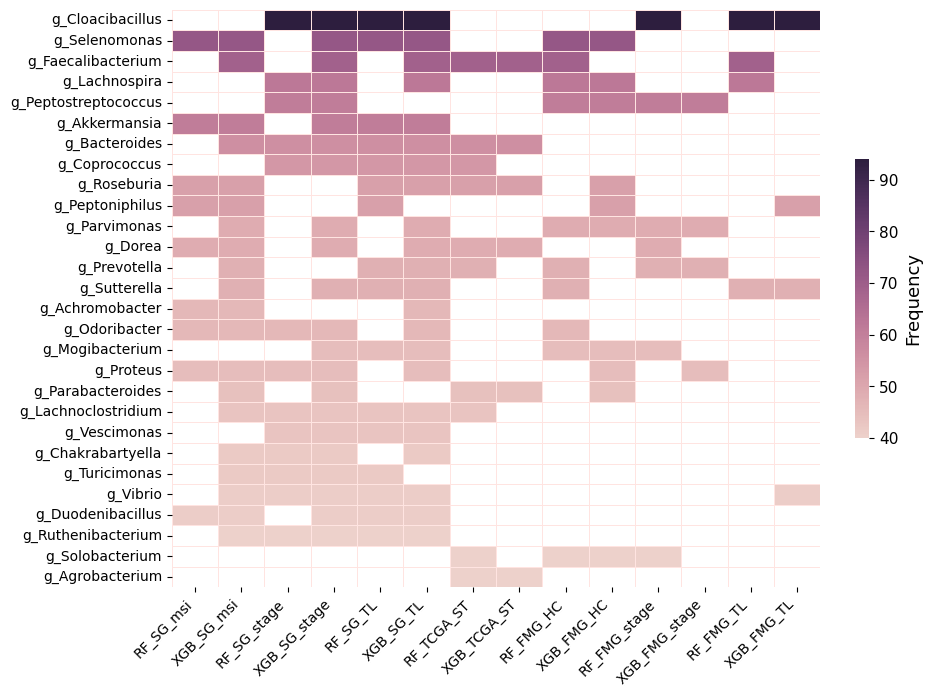

In [120]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')
#result_df.fillna(0, inplace=True)  # Replace NaN with 0 for scaling

# Apply Min-Max Scaling and invert the result
#scaler = MinMaxScaler()
#scaled_df = scaler.fit_transform(result_df)

# Convert to DataFrame
#normalized_df = pd.DataFrame(scaled_df, index=result_df.index, columns=result_df.columns)


# Fill NaN values with 0 if necessary
#normalized_df = normalized_df.fillna(0)

# Create a heatmap with broader lines between cells
plt.figure(figsize=(9, 7.5))
cmap = sns.cubehelix_palette(as_cmap=True)
heatmap = sns.heatmap(result_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Frequency', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')
# Adjust the color bar label size
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Frequency', fontsize=13)  # Change 'fontsize' to your desired size

# Optionally adjust the tick label size if needed
colorbar.ax.tick_params(labelsize=11)

plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Display the heatmap
plt.show()